In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1

### You have to create a function that receives a list of numbers like=[23,14,13,56,78,98,12] and returns its inter quartile range(IQR)

In [12]:
def iqr(l):
    x=l[:]      # Copying the list into another variable to preserve original list
    x=sorted(x)    # Sorting the list
    n=len(x)    # Length of the list
    q1=x[int((n+1)/4)-1]    # Calculating 1st quartile, q1= (n+1)/4 th item
    q3=x[int(3*(n+1)/4)-1]  # Calculatinf 3rd quartile, q3= (n+1)*3/4 th item 
    return q3-q1     # returning the inter-quartile range

In [13]:
iqr([24,14,13,56,78,98,12])

65

In [14]:
iqr(range(50))

26

# Q2

### Plot a histogram for total team scores for all IPL games

In [16]:
matches=pd.read_csv('matches (1).csv')
delivery=pd.read_csv('deliveries(1).csv')

In [32]:
team_scores=delivery.groupby(['match_id','batting_team']).sum()['total_runs'].reset_index()   # Applying groupby for match_id and batting_team and adding the total_runs

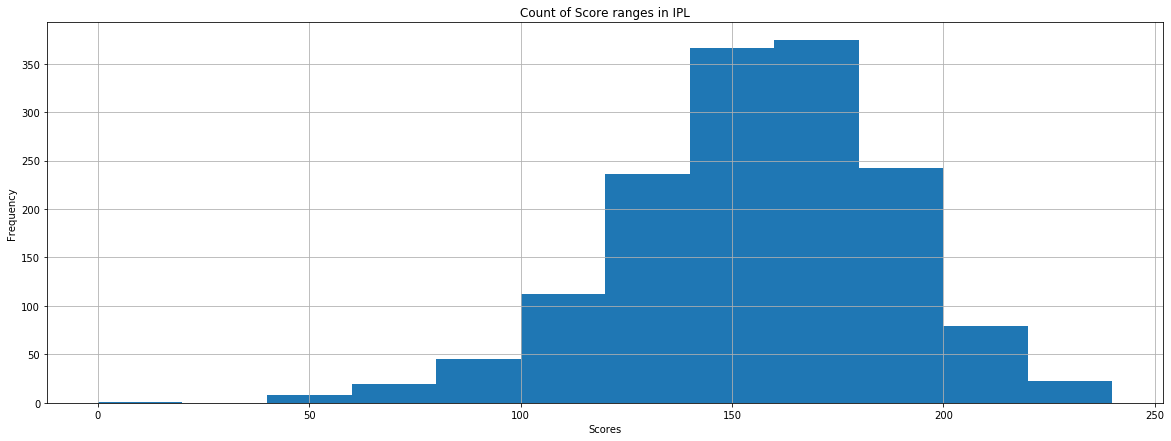

In [37]:
team_scores['total_runs'].hist(bins=range(0,250,20),figsize=(20,7))   # Plotting the histogram
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Count of Score ranges in IPL')
plt.show()

So, there are almost 250 times where teams have scored between 120 to 140. There are almost 350 times where teams have scored 140 to 160 and same is the case with 160 to 180.

# Q3

### Find the skewness of the bowler economy data where the bowler has bowled a minimum of 300 balls(50 overs).

In [72]:
balls_played=delivery['bowler'].value_counts()     # Counting the number of balls played by each bowler
balls_played=balls_played[balls_played>300]     # Retaining only those bowlers who have played atleast 300 balls

In [46]:
bowlers=delivery[delivery['bowler'].isin(balls_played.index.to_list())]    # Filtering the data based on those bowlers only

In [51]:
economy=(bowlers.groupby('bowler').sum()['total_runs']/balls_played*6).sort_values()   # Calculating the economy of the bowlers and sorting them

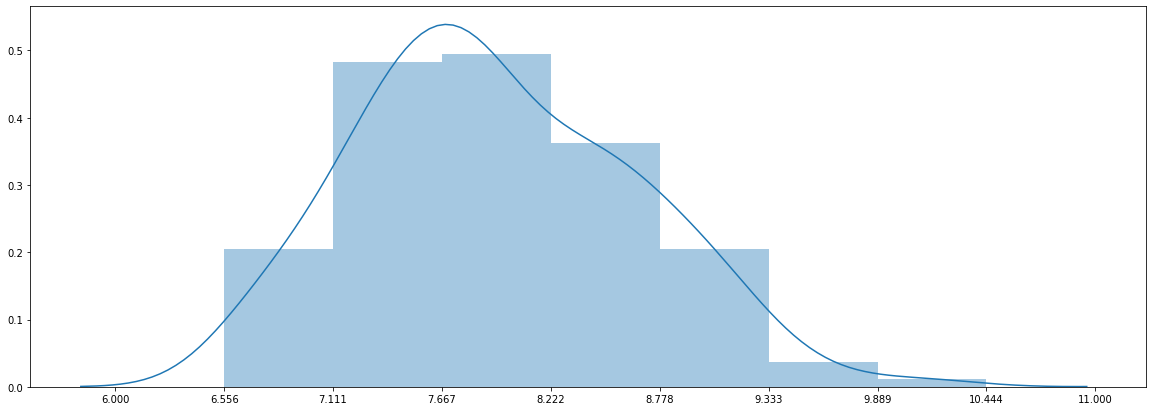

In [71]:
plt.subplots(figsize=(20,7))
sns.distplot(economy,bins=np.linspace(6,11,10))    # Plotting the distplot to see the distribution 
plt.xticks(np.linspace(6,11,10))
plt.show()

### Finding skewness
Formula: Pearson's coefficients of skewness | 
sk= (x-M)/s where x=mean, M=Median and s =standard deviation                          

In [86]:
sk= (economy.mean()-economy.median())/economy.std()

In [88]:
sk

0.09972962381689944

The economy data is almost a normal distribution with a slight negative skewness. 

# Q4

### Give three examples of negatively skewed data and 3 examples of positively skewed data

## Negative Skewness

In [98]:
# EX1
a=np.array([0,1,2,3,4,5,6,7,8,9,10,789,1000])
(np.mean(a)-np.median(a))/np.std(a)    # Skewness

0.41979324929098155

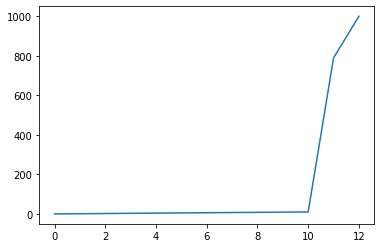

In [99]:
plt.plot(range(a.size),a)

In [100]:
# EX2
a=np.array([0,1,2,3,4,5,6,7,8,9,10,100,150,200,56,34,2,1])
(np.mean(a)-np.median(a))/np.std(a)   # Skewness

0.47355917412181914

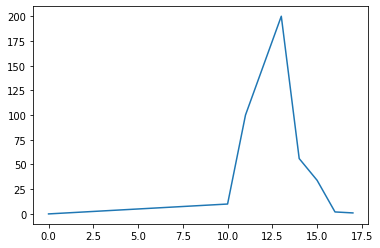

In [101]:
plt.plot(range(a.size),a)

## Positive Skewness

In [102]:
# Ex1
a=np.array([1,2,34,56,200,150,100,10,9,8,7,6,5,4,3,2,1,0])
(np.mean(a)-np.median(a))/np.std(a)   # Skewness


0.47355917412181914

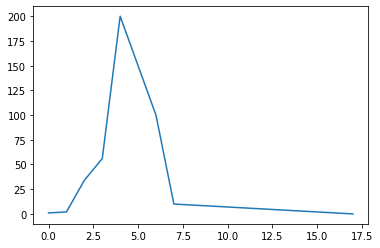

In [103]:
plt.plot(range(a.size),a)

In [104]:
# Ex2
a=np.array([1000,789,10,9,8,7,6,5,4,3,2,1,0])
(np.mean(a)-np.median(a))/np.std(a)

0.41979324929098155

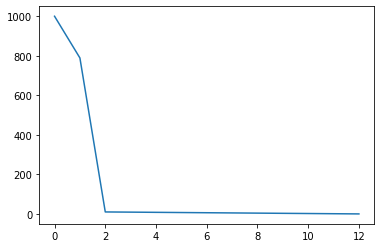

In [105]:
plt.plot(range(a.size),a)